# PROJECT 1

## 1. Import libraries

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
import warnings
warnings.filterwarnings('ignore')

## 2. Read the database

In [81]:
df = pd.read_csv("data/attacks.csv", encoding='latin')
df

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Exploratory analysis

In [82]:
df.sample()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
19473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
df.shape

(25723, 24)

In [84]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

## 4. General cleaning:

#### Cleaning columns

In [86]:
df.columns = [i.lower().replace(" ", "_") for i in df.columns.str.strip()]
df.columns

Index(['case_number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time',
       'species', 'investigator_or_source', 'pdf', 'href_formula', 'href',
       'case_number.1', 'case_number.2', 'original_order', 'unnamed:_22',
       'unnamed:_23'],
      dtype='object')

In [87]:
df.drop(columns=["case_number", "investigator_or_source", "pdf", "href_formula", "href", "case_number.1", "case_number.2", "original_order", "unnamed:_22", "unnamed:_23"], axis = 1, inplace = True)
df.head()

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal_(y/n),time,species
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m"


#### Cleaning rows

In [88]:
pd.isna(df).sum()

date           19421
year           19423
type           19425
country        19471
area           19876
location       19961
activity       19965
name           19631
sex            19986
age            22252
injury         19449
fatal_(y/n)    19960
time           22775
species        22259
dtype: int64

In [89]:
df.dropna(how="all", inplace = True)

In [90]:
df.shape

(6302, 14)

In [91]:
pd.isna(df).sum()

date              0
year              2
type              4
country          50
area            455
location        540
activity        544
name            210
sex             565
age            2831
injury           28
fatal_(y/n)     539
time           3354
species        2838
dtype: int64

In [92]:
df.duplicated().sum()

2

In [93]:
df.drop_duplicates(inplace=True)

#### ***FIRST QUESTION***: Are swimmers more likely to be fataly attacked by a shark than surfers?

- **General cleaning**

In [94]:
# Check if there are null values in the variables used for our analysis
pd.isna(df[["activity", "fatal_(y/n)"]]).sum()

activity       544
fatal_(y/n)    539
dtype: int64

In [95]:
# Drop any row with null values for both variables
df_1 = df[["activity", "fatal_(y/n)"]].dropna(how="all")

In [96]:
# Check shape --> the number of rows has decreased
df_1.shape

(6175, 2)

In [97]:
# Set all values of both variables to "string", as they are categorical variables.
df_1 = df_1.astype(dtype=str)

- **Cleaning the column "activity"**

In [98]:
# Set the values of activity to lowercase
df_1["activity"] = [i.lower() for i in df_1["activity"]]

In [99]:
# Subset of the database with only those rows whose activity contains either "swim" or "surf"
df_2 = df_1[df_1["activity"].str.contains("swim|surf") == True]

In [100]:
# Create a new column called "activity_swim_surf" that contains only "swim" or "surf"
df_2["activity_swim_surf"] = df_2["activity"].apply(lambda x:"swim" if "swim" in x else "surf")

- **Cleaning the column "fatal_(y/n)"**

In [101]:
# Check unique values for the "fatal_(y/n)" variable
df_2["fatal_(y/n)"].unique()

array(['N', 'Y', 'nan', 'UNKNOWN', ' N'], dtype=object)

In [102]:
# Strip whitespaces from left and right
df_2["fatal_(y/n)"] = df_2["fatal_(y/n)"].str.strip()

In [103]:
# Check unique values for the "fatal_(y/n)" variable --> they have decreased
df_2["fatal_(y/n)"].unique()

array(['N', 'Y', 'nan', 'UNKNOWN'], dtype=object)

In [104]:
# Check the proportion of each category for the "fatal_(y/n)" variable
df_2["fatal_(y/n)"].value_counts(normalize=True) * 100

fatal_(y/n)
N          72.285594
Y          20.701310
nan         6.421631
UNKNOWN     0.591466
Name: proportion, dtype: float64

In [105]:
# Leave out of analysis the UNKNOWN VALUES as they represent less than 1% of the shark attacks
df_2 = df_2[df["fatal_(y/n)"] != "UNKNOWN"]

In [106]:
df_2["fatal_(y/n)"].value_counts(normalize=True) * 100

fatal_(y/n)
N      72.715682
Y      20.824479
nan     6.459839
Name: proportion, dtype: float64

In [107]:
# Group by activity (swim or surf) and attack type (fatal or not) and count the rows
df_2.pivot_table (
    values = "fatal_(y/n)",
    index = ["activity_swim_surf", "fatal_(y/n)"],
    aggfunc = "count"
)

activity
activity_swim_surf fatal_(y/n)          
surf               N                1121
                   Y                  70
                   nan                47
swim               N                 590
                   Y                 420
                   nan               105

- **Plot visualization**

In [206]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

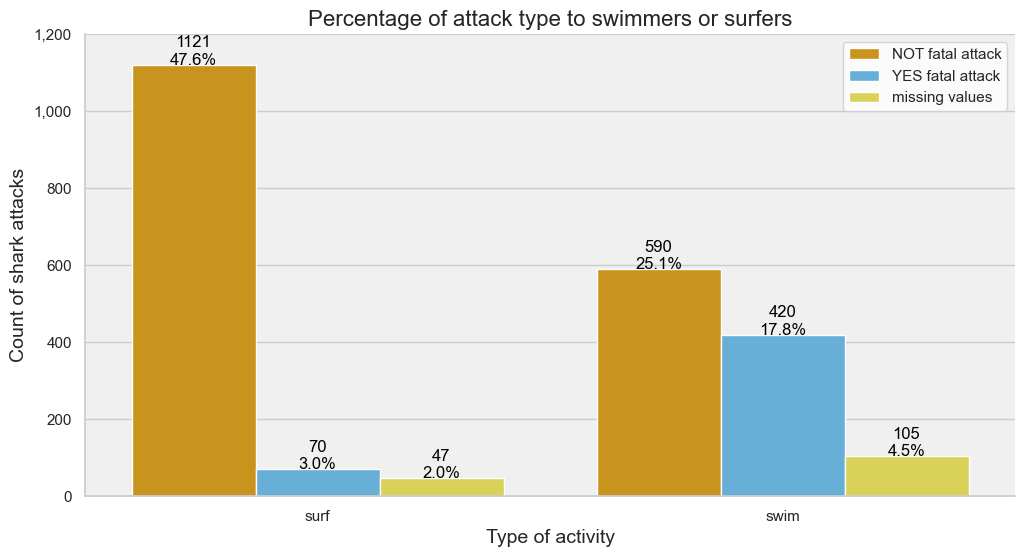

In [301]:
# Set a color palette for the countplot
colors = ['#E69F00', '#56B4E9', '#F0E442'] 

ax = sns.countplot(x=df_2["activity_swim_surf"], hue=df_2["fatal_(y/n)"], data = df_2, palette=colors)

ax.set_facecolor('#F0F0F0')

plt.xlabel('Type of activity', fontsize=14)
plt.ylabel('Count of shark attacks', fontsize=14)
plt.title('Percentage of attack type to swimmers or surfers', fontsize=16)


for p in ax.patches:
    height = int(p.get_height())
    percentage = height / len(df_2) * 100
    ax.annotate(f'{height}\n{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='baseline', 
                fontsize=12, color='black')

ax.legend(labels=["NOT fatal attack", "YES fatal attack", "missing values"], title_fontsize=12)  # Replace 'Other' with appropriate label

sns.despine()

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax.set_ylim(0, 1200)  # Replace 60 with the desired maximum value for y-axis

plt.show()

#### ***SECOND QUESTION***: Are sharks more hunger for younger people than older people? And How is the attack type according to age?

- **General cleaning**

In [112]:
df.columns

Index(['date', 'year', 'type', 'country', 'area', 'location', 'activity',
       'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time', 'species'],
      dtype='object')

In [113]:
# Check if there are null values in the variables used for our analysis
pd.isna(df[["age", "fatal_(y/n)"]]).sum()

age            2829
fatal_(y/n)     539
dtype: int64

In [114]:
# Drop any row with null values for both variables
df_3 = df[["age", "fatal_(y/n)"]].dropna(how="any")

In [115]:
df_3.shape

(3244, 2)

In [116]:
# Set all values to "string", to run string methods.
df_3 = df_3.astype(dtype=str)

- **Cleaning the column "age"**

In [117]:
# Chek age values whose length is greater than 2. 
for i in df_3["age"]:
    if len(i) > 2:
        print(i)

40s
20s
Teen
40s
60s
18 months
40s
20s
30s
50s
Teen
teen
teen
teen
28 & 26
30s
20s
Teen
teen
18 or 20
Teen
12 or 13
30s
20s
46 & 34
28, 23 & 30
teen
30s
Teens
30s
Teen
36 & 26
30 or 36
21 & ?
33 or 37
mid-30s
 30
7      &    31
 28
20?
60's
32 & 30
30s
30s
Elderly
20s
20s
74 
45 
21 or 26
20 
20s
>50
18 to 22
adult
9 & 12
9 months
Teen
25 to 35
23 & 26
(adult)
33 & 37
25 or 28
30 & 32
50 & 30
17 & 35
"middle-age"
13 or 18
33 & 26
MAKE LINE GREEN
 43
"young"
7 or 8
17 & 16
8 or 10
Both 11
9 or 10
young
36 & 23
Teen
50s
A.M.
?    &   14
10 or 12
31 or 33
Teen
7 or 8
young
13 or 14


In [118]:
# Strip whitespaces from left and right and make strings lowercase
df_3["age"] = [i.lower() for i in df_3["age"].str.strip()]

In [119]:
# Substitute the values ended with 's (for eg. 20s, 30s, 40s) for the two first digits
df_3["age"] = df_3["age"].apply(lambda x : x[0:2] if len(x) == 3 and "s" in x else x)

In [120]:
# According to the United Nations adolescents experience a transition period from childhood to adulthood between the ages of 10 and 19. So we assume "teen" equals approximately to 15 years old.
df_3["age"] = df_3["age"].str.replace("teen", "15")

In [121]:
# Take the first age in those values that referts to an age "or" another.
df_3["age"] = df_3["age"].apply(lambda x : x.strip()[0:2] if "or" in x else x)

In [122]:
# Take the first age in those values that referts to an age "to" another.
df_3["age"] = df_3["age"].apply(lambda x : x.strip()[0:2] if "to" in x else x)

In [123]:
# Drop the rows whose age is set to one age "&" another age because as it is referring to more than one person we assume it is not valid data.
df_3 = df_3[df_3["age"].str.contains("&")==False]

In [124]:
# Manual replacements
df_3["age"] = df_3["age"].str.replace("15s", "15")
df_3["age"] = df_3["age"].str.replace(">50", "50")
df_3["age"] = df_3["age"].str.replace("18 months", "1")
df_3["age"] = df_3["age"].str.replace("mid-30s", "35")
df_3["age"] = df_3["age"].str.replace("20?", "20")
df_3["age"] = df_3["age"].str.replace("60's", "60")
df_3["age"] = df_3["age"].str.replace("mid-20s", "20")
df_3["age"] = df_3["age"].str.replace("ca. 33", "33")
df_3["age"] = df_3["age"].str.replace("2½", "2")


In [125]:
# Chek age values whose length is greater than 2. 
for i in df_3["age"]:
    if len(i) > 2:
        print(i)

elderly
adult
9 months
(adult)
"middle-age"
make line green
"young"
both 11
young
a.m.
young


In [126]:
# Indentify the rows whose age lenght is greater than 2 characters.
df_3["age"] = df_3["age"].apply(lambda x : "excuded values" if len(x) > 2 else x)

In [127]:
df_3["age"].value_counts()

age
15    151
18    145
20    141
17    140
16    136
     ... 
6½      1
72      1
84      1
86      1
2       1
Name: count, Length: 88, dtype: int64

In [128]:
# Set age values as "numerical".
df_3["age"] = pd.to_numeric(df_3["age"], errors='coerce')

- **Cleaning the column "fatal_(y/n)"**

In [129]:
# Check unique values for the "fatal_(y/n)" variable
df_3["fatal_(y/n)"].unique()

array(['N', 'Y', 'M', '2017', 'UNKNOWN', ' N'], dtype=object)

In [130]:
# Strip whitespaces from left and right
df_3["fatal_(y/n)"] = df_3["fatal_(y/n)"].str.strip()

In [131]:
# Check unique values for the "fatal_(y/n)" variable --> they have decreased
df_3["fatal_(y/n)"].unique()

array(['N', 'Y', 'M', '2017', 'UNKNOWN'], dtype=object)

In [132]:
# Check the proportion of each category for the "fatal_(y/n)" variable
df_3["fatal_(y/n)"].value_counts(normalize=True) * 100

fatal_(y/n)
N          80.539200
Y          19.088937
UNKNOWN     0.309885
M           0.030989
2017        0.030989
Name: proportion, dtype: float64

In [133]:
# Leave out of analysis the "UNKNOWN", "M", "2017" VALUES,  as they represent less than 1% of the shark attacks
df_3 = df_3[df["fatal_(y/n)"] != "UNKNOWN"]
df_3 = df_3[df["fatal_(y/n)"] != "M"]
df_3 = df_3[df["fatal_(y/n)"] != "2017"]

In [267]:
# Manual replacements
df_3["fatal_(y/n)"] = df_3["fatal_(y/n)"].str.replace("Y", "Yes")
df_3["fatal_(y/n)"] = df_3["fatal_(y/n)"].str.replace("N", "No")

In [268]:
df_3["fatal_(y/n)"].value_counts(normalize=True) * 100

fatal_(y/n)
No     80.839813
Yes    19.160187
Name: proportion, dtype: float64

- **Plot visualization**

In [ ]:
# Set a color palette for the countplot
colors = ['#E69F00', '#56B4E9', '#F0E442'] 

ax = sns.countplot(x=df_2["activity_swim_surf"], hue=df_2["fatal_(y/n)"], data = df_2, palette=colors)

ax.set_facecolor('#F0F0F0')

plt.xlabel('Type of activity', fontsize=14)
plt.ylabel('Count of shark attacks', fontsize=14)
plt.title('Percentage of attack type to swimmers or surfers', fontsize=16)


for p in ax.patches:
    height = int(p.get_height())
    percentage = height / len(df_2) * 100
    ax.annotate(f'{height}\n{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='baseline', 
                fontsize=12, color='black')

ax.legend(labels=["NOT fatal attack", "YES fatal attack", "missing values"], title_fontsize=12)  # Replace 'Other' with appropriate label

sns.despine()

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

ax.set_ylim(0, 1200)  # Replace 60 with the desired maximum value for y-axis


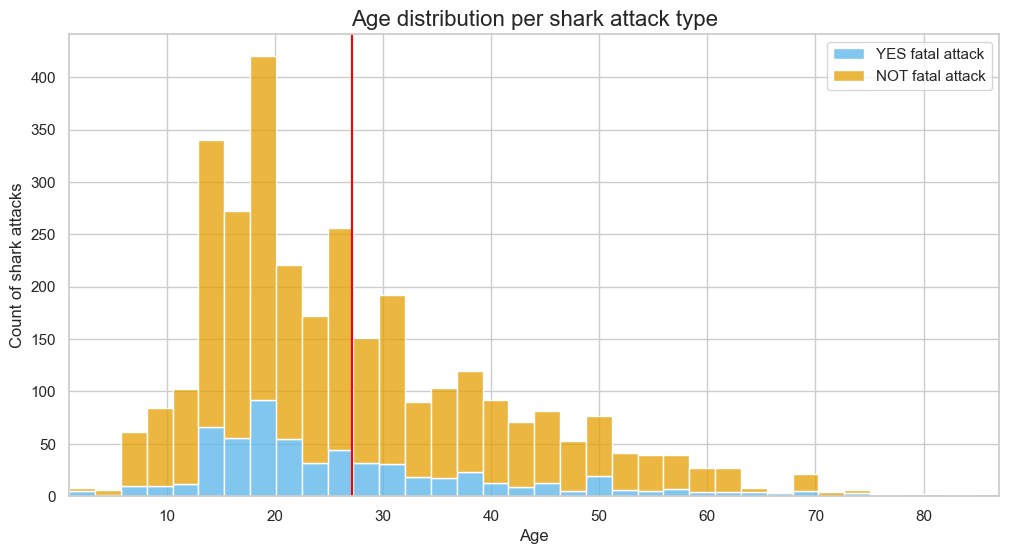

In [319]:
colors = ['#E69F00', '#56B4E9'] 

graf_2 = sns.histplot(data=df_3, x="age", hue="fatal_(y/n)", multiple="stack",  palette=colors)
ax.set_facecolor('#F0F0F0')

plt.xlabel("Age")
plt.ylabel("Count of shark attacks")
plt.legend(labels = ["YES fatal attack", "NOT fatal attack"], loc = 'upper right')
plt.title("Age distribution per shark attack type", fontsize= 16)

graf_2.margins(x=0)  # Set the x-margin to 0


graf_2.axvline(x=df_3.age.mean(), c="red", label = "Mean");


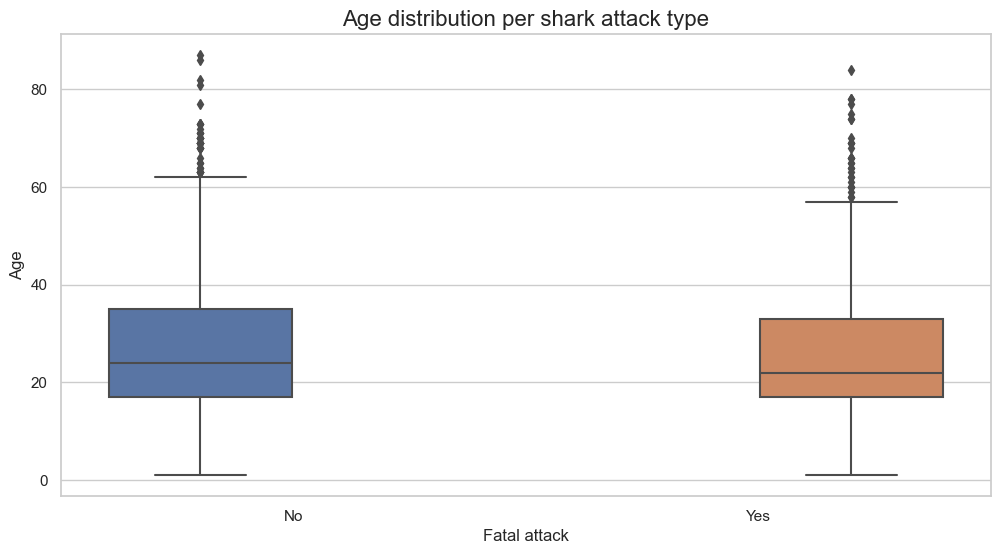

In [270]:
graf_3 = sns.boxplot(data=df_3, x="fatal_(y/n)", y="age", hue="fatal_(y/n)");
plt.gca().get_legend().remove()
plt.xlabel("Fatal attack")
plt.ylabel("Age")
plt.title("Age distribution per shark attack type", fontsize= 16);

In [148]:
"""
% DE GENTE JOVEN Y MAYOR EN LA POBLACIÓN
EL % ES GENTE MENOR DE X
titulos
"""

'\nBOX PLOT\nLINEA HORIZONTAL CON MEDIA\n% DE GENTE JOVEN Y MAYOR EN LA POBLACIÓN\nEL % ES GENTE MENOR DE X\n'

#### ***THIRD QUESTION***: Has there been more fatal atacks of white sharks after the JAWS film was released (1975)?

In [137]:
df.columns

Index(['date', 'year', 'type', 'country', 'area', 'location', 'activity',
       'name', 'sex', 'age', 'injury', 'fatal_(y/n)', 'time', 'species'],
      dtype='object')

In [138]:
# Check if there are null values in the variables used for our analysis
pd.isna(df[["year"]]).sum()

year    2
dtype: int64

In [139]:
# Drop any row with null values for both variables
df_4 = df[["year"]].dropna(how="all")

In [140]:
df_4.shape

(6298, 1)

In [141]:
# Set all values to "string", to run string methods.
df_4 = df_4.astype(dtype=str)

In [142]:
# Take into account only years that starts with 1 or 2:
df_4 = df_4[df_4["year"].str.startswith(('1', '2'))]

In [143]:
# Set all values of age variable to "numeric".
df_4['year'] = pd.to_numeric(df_4['year'], errors='coerce')

- **Plot visualization**

In [145]:
# Remove the years previous to 1800 since the number of attacks is not significant.
df_5 = df_4[df_4['year'] > 1800]

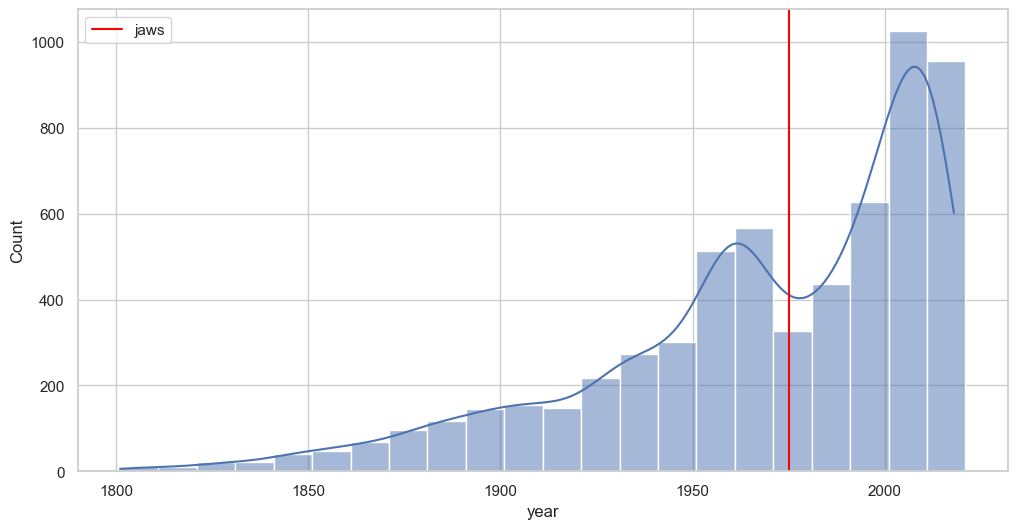

In [146]:
# Plot the results of the analysis
graf_3 = sns.histplot(x=df_5['year'], binwidth=10, kde = True);
graf_3.axvline(x=1975, c="red", label = "jaws")
plt.legend();

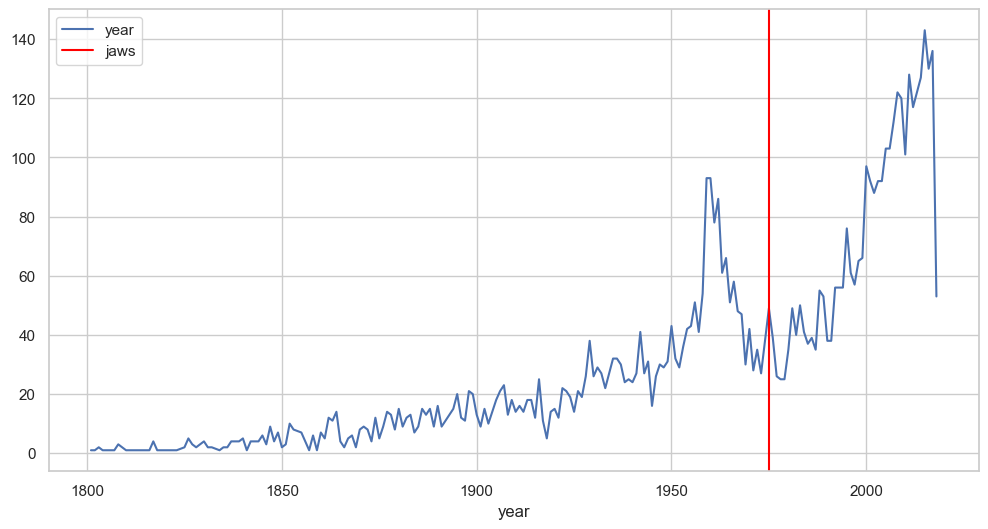

In [147]:
graf_4 = df_5.groupby(['year'])['year'].count().plot.line().get_figure()
plt.axvline(x=1975, c="red", label = "jaws")
plt.legend();